In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

plt.style.use('ggplot') 

%matplotlib inline

In [2]:
ROOTDIR = '../'
image_dir = ROOTDIR + '/data/2015/'
inputfile = ROOTDIR  + '/data/2015-Z-ALL-COUNTERS.csv'
raw_count_data = pd.read_csv(inputfile)
raw_count_data.drop_duplicates(inplace=True)

train_images = np.genfromtxt(ROOTDIR + '/data/2015-checked-train.txt',dtype='str')

IMAGES = len(train_images)

allfile = ROOTDIR  + '/data/2015-Z-LOCATIONS.csv'
proc_data = pd.read_csv(allfile)

In [3]:

counts = np.zeros(IMAGES) 

i=-1
for filename in train_images: 

    i=i+1
    df3 = proc_data.loc[proc_data.image_name == filename]
    counts[i] = len(df3.xcoord.values)

 


In [10]:
raw_count_data

,classification_id,subject_ids,user_name,tile_id,SWC_image,total_marks,mark_index,xcoord,ycoord
0,53453920,6135540,MSAC,SWC0001_1_1,SWC0001,3,1,127.900665,987.346130
1,53453920,6135540,MSAC,SWC0001_1_1,SWC0001,3,2,36.480007,1021.458313
2,53453920,6135540,MSAC,SWC0001_1_1,SWC0001,3,3,50.124882,737.644897
3,54116489,6135540,bjork15640,SWC0001_1_1,SWC0001,3,1,46.555336,1034.125244
4,54116489,6135540,bjork15640,SWC0001_1_1,SWC0001,3,2,142.347992,968.812073
5,54116489,6135540,bjork15640,SWC0001_1_1,SWC0001,3,3,50.909550,740.216003
6,55719023,6135540,vulpecula_k18,SWC0001_1_1,SWC0001,3,1,49.688423,749.946777
7,55719023,6135540,vulpecula_k18,SWC0001_1_1,SWC0001,3,2,129.065353,986.187622
8,55719023,6135540,vulpecula_k18,SWC0001_1_1,SWC0001,3,3,34.568985,1010.756714
9,56284291,6135540,Quarkgc,SWC0001_1_1,SWC0001,3,1,47.573029,742.948486


In [67]:


mean_counts = np.zeros(IMAGES) 
counters = np.zeros(IMAGES) 

i=0
# uses clustering to group identifications by multiple counters into one average location
for filename in train_images: 
    imcount=0
    imcounters=0
    df = raw_count_data[raw_count_data['SWC_image'] == filename]
    for tile in df.groupby(['tile_id']):
        aa = tile[1].drop_duplicates('user_name')
        imcount+=aa['total_marks'].mean()
        imcounters+=len(aa)
        print(imcounters)
    mean_counts[i]=imcount
    counters[i]=imcounters/12
    i=i+1
print((np.mean(np.power(mean_counts-counts,2)))**0.5)

1
16
26
28
41
53
54
68
82
13
27
40
55
70
84
99
104
8
10
23
24
38
49
50
62
75
76
15
28
42
57
72
82
97
110
124
139
154
1
2
3
4
5
20
15
21
36
50
64
14
19
30
43
55
65
76
89
102
13
14
15
16
17
13
28
42
56
57
15
23
29
16
31
38
53
66
81
82
96
14
15
30
44
59
72
87
101
116
120
135
11
21
32
33
46
47
50
61
63
14
29
44
46
61
75
13
14
15
15
30
43
57
71
72
83
12
27
40
55
69
84
96
110
126
140
155
170
2
16
19
20
21
12
24
39
54
66
81
95
110
128
143
157
171
1
15
16
28
15
16
19
20
25
27
15
16
29
31
45
57
72
15
26
41
44
45
58
73
88
13
27
28
43
57
70
84
96
109
121
136
15
17
18
20
21
36
50
14
15
30
43
55
70
85
3
9
24
38
51
64
66
15
28
42
57
72
87
102
116
127
142
154
165
14
29
32
44
58
72
86
95
110
125
14
28
43
58
73
88
102
116
14
27
41
55
69
78
92
93
107
8
12
15
17
18
21
22
1
16
30
32
47
48
63
78
1
12
21
22
24
26
15
28
39
54
68
69
80
94
104
118
131
10
11
12
13
14
28
43
58
68
82
95
15
17
18
33
34
40
42
12
25
39
54
67
82
96
108
121
134
135
150
15
30
44
54
67
82
97
110
124
139
153
15
28
40
41
42
43
44
45
47
50

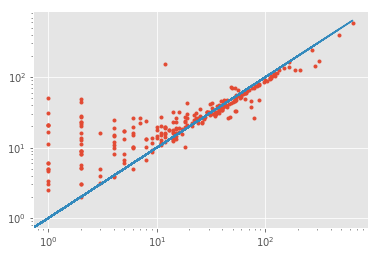

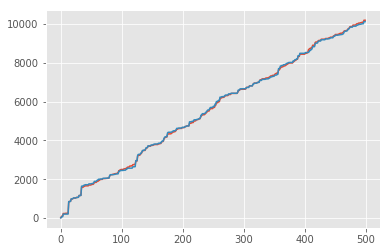

In [8]:
plt.loglog(counts,mean_counts,'.')
plt.loglog(counts,counts,'-')
plt.show()
plt.plot(np.cumsum(mean_counts))
plt.plot(np.cumsum(counts))
plt.show()

In [10]:
(np.mean(np.power(mean_counts-counts,2)))**0.5

15.103776423395274

In [43]:
tile[1].drop_duplicates('user_name')

,classification_id,subject_ids,user_name,tile_id,SWC_image,total_marks,mark_index,xcoord,ycoord
329565,53494069,6217928,n1176mc172,SWC1367_1_1,SWC1367,2,1,201.120773,628.805359


In [19]:
aa.iloc[0:2].total_marks.mean()

6.0

In [32]:

mean_counts_1 = np.zeros(IMAGES) 
counters = np.zeros(IMAGES) 

i=0
# uses clustering to group identifications by multiple counters into one average location
for filename in train_images: 
    imcount=0
    imcounters=0
    df = raw_count_data[raw_count_data['SWC_image'] == filename]
    for tile in df.groupby(['tile_id']):
        aa = tile[1].drop_duplicates('user_name')
        imcount+=aa.iloc[0]['total_marks'].mean()
        
    mean_counts_1[i]=imcount
    i=i+1

print((np.mean(np.power(mean_counts_1-counts,2)))**0.5)

15.1037764234


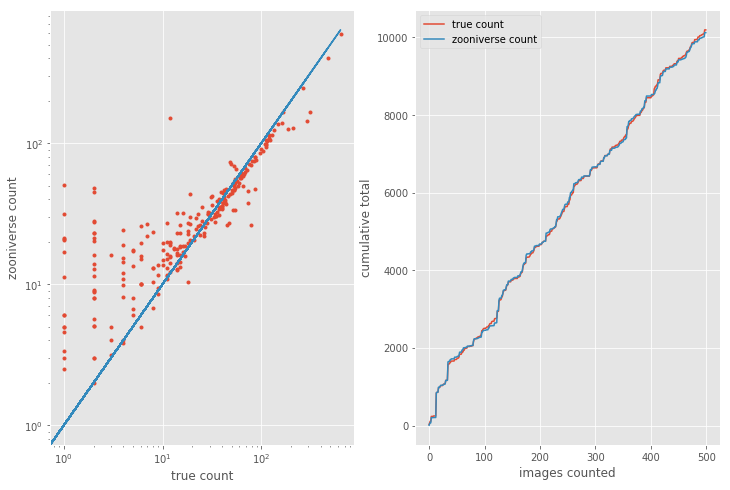

In [106]:

plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.loglog(counts,mean_counts,'.')
plt.loglog(counts,counts,'-')
plt.xlabel('true count')
plt.ylabel('zooniverse count')
#plt.show()
plt.subplot(1, 2, 2)
plt.plot(np.cumsum(mean_counts),label='true count')
plt.plot(np.cumsum(counts),label='zooniverse count')
plt.legend()
plt.xlabel('images counted')
plt.ylabel('cumulative total')
plt.savefig('z_count.png', bbox_inches='tight',dpi=300)

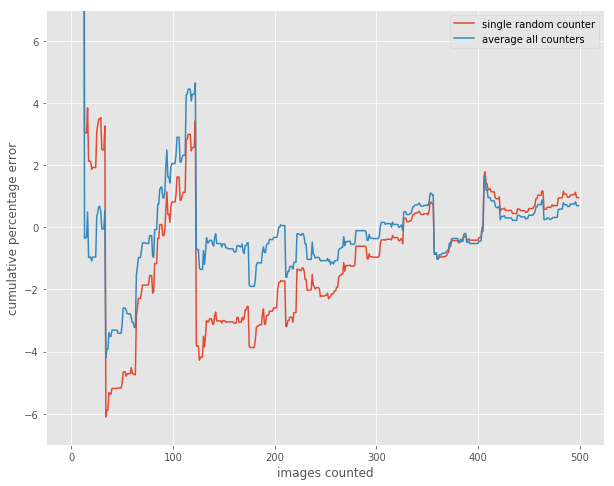

In [46]:
total_one=np.cumsum(mean_counts_1)
total_all=np.cumsum(mean_counts)
total=np.cumsum(counts)
pertot = 100*(total_one-total)/total
pertot_all = 100*(total_all-total)/total
plt.figure(figsize=(10,8))
plt.plot(pertot,label='single random counter')
plt.plot(pertot_all,label='average all counters')
plt.legend()
plt.ylim(-7,7)
plt.xlabel('images counted')
plt.ylabel('cumulative percentage error')
plt.savefig('error.png', bbox_inches='tight',dpi=300)

In [30]:
print((np.mean(np.power(mean_counts-counts,2)))**0.5)

15.1037764234


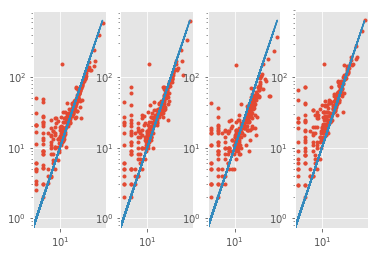

In [52]:
plt.subplot(1, 4, 1)
plt.loglog(counts,mean_counts,'.')
plt.loglog(counts,counts,'-')
#plt.show()
plt.subplot(1, 4, 2)
plt.loglog(counts,mean_counts_1,'.')
plt.loglog(counts,counts,'-')
plt.subplot(1, 4, 3)
plt.loglog(counts,min_counts,'.')
plt.loglog(counts,counts,'-')
plt.subplot(1, 4, 4)
plt.loglog(counts,max_counts,'.')
plt.loglog(counts,counts,'-')
plt.show()

In [51]:

min_counts = np.zeros(IMAGES) 
max_counts = np.zeros(IMAGES) 


i=0
# uses clustering to group identifications by multiple counters into one average location
for filename in train_images: 
    maxcount=0
    mincount=0
    df = raw_count_data[raw_count_data['SWC_image'] == filename]
    for tile in df.groupby(['tile_id']):
        aa = tile[1].drop_duplicates('user_name')
        mincount+=aa['total_marks'].min()
        maxcount+=aa['total_marks'].max()
        
    min_counts[i]=mincount
    max_counts[i]=maxcount
    
    i=i+1
print((np.mean(np.power(min_counts-counts,2)))**0.5)
print((np.mean(np.power(max_counts-counts,2)))**0.5)

27.7720002881
15.5967945425


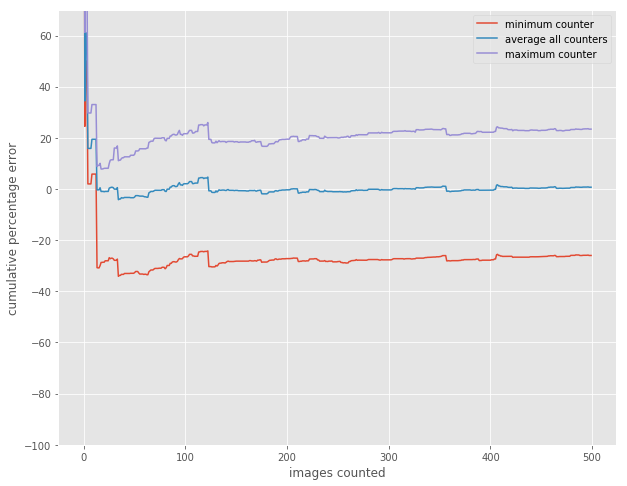

In [86]:
total_one=np.cumsum(min_counts)
total_max=np.cumsum(max_counts)
total_all=np.cumsum(mean_counts)
total=np.cumsum(counts)
pertot = 100*(total_one-total)/total
pertot_max = 100*(total_max-total)/total
pertot_all = 100*(total_all-total)/total
plt.figure(figsize=(10,8))
plt.plot(pertot,label='minimum counter')
plt.plot(pertot_all,label='average all counters')
plt.plot(pertot_max,label='maximum counter')
plt.legend()
plt.ylim(-100,70)
plt.xlabel('images counted')
plt.ylabel('cumulative percentage error')
plt.savefig('minmaxerror.png', bbox_inches='tight',dpi=300)

In [10]:
yolo_counts = np.genfromtxt('yolo3_results.csv',dtype='int', delimiter=',')

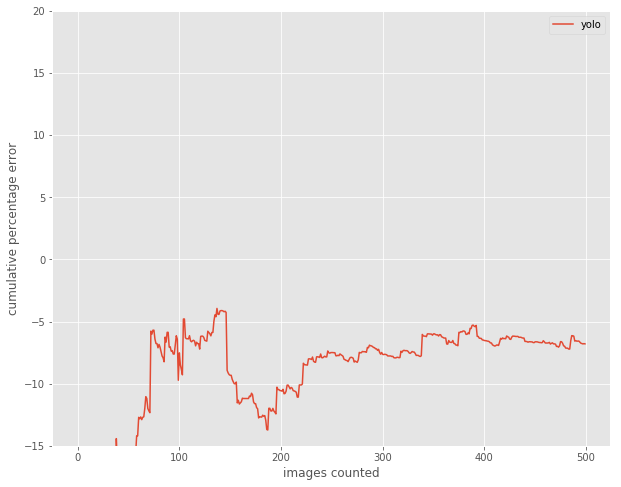

In [8]:
total_yolo=np.cumsum(yolo_counts[:,0])
total=np.cumsum(yolo_counts[:,1])

pertot = 100*(total_yolo-total)/total

plt.figure(figsize=(10,8))
plt.plot(pertot,label='yolo')
plt.legend()
plt.ylim(-15,20)
plt.xlabel('images counted')
plt.ylabel('cumulative percentage error')
plt.savefig('yolo.png', bbox_inches='tight',dpi=300)

/home/staff1/ctorney/python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


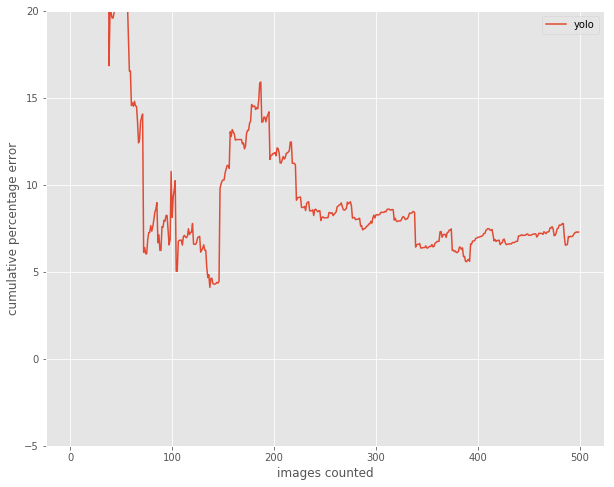

In [6]:
yolo_counts.shape
yolo_counts = np.genfromtxt('yolo_results.csv',dtype='int', delimiter=',')
total_yolo=np.cumsum(yolo_counts[:,1])
total=np.cumsum(yolo_counts[:,0])

pertot = 100*(total_yolo-total)/total

plt.figure(figsize=(10,8))
plt.plot(pertot,label='yolo')
plt.legend()
plt.ylim(-5,20)
plt.xlabel('images counted')
plt.ylabel('cumulative percentage error')
plt.savefig('yolo.png', bbox_inches='tight',dpi=300)

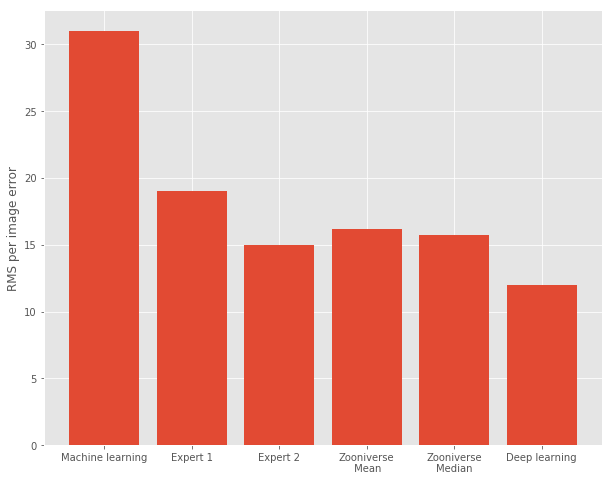

In [16]:
x = np.arange(6)
rmserr = [31,19,15,16.2,15.7,11.98]
plt.figure(figsize=(10,8))
plt.bar(x, rmserr)
plt.ylabel('RMS per image error')
plt.xticks(x, ('Machine learning', 'Expert 1', 'Expert 2', 'Zooniverse\n Mean', 'Zooniverse\nMedian', 'Deep learning'))
plt.savefig('rms.png', bbox_inches='tight',dpi=300)

In [11]:
print((np.mean(np.power(yolo_counts[:,1]-yolo_counts[:,0],2)))**0.5)

11.9844899766


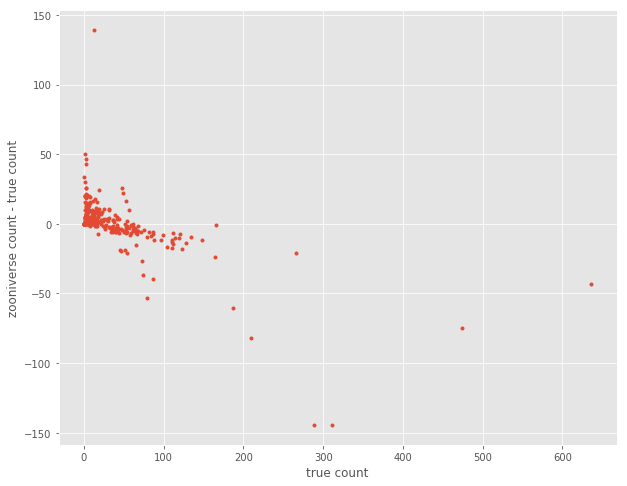

In [113]:

plt.figure(figsize=(10,8))
plt.plot(counts,mean_counts-counts,'.')


plt.xlabel('true count')
plt.ylabel('zooniverse count - true count')
plt.savefig('errorvcount.png', bbox_inches='tight',dpi=300)
